# EDA

In [3]:
pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import datetime as dt

from wordcloud import WordCloud, STOPWORDS

In [5]:
Clean_BA_Data = pd.read_csv("C:/Users/vatsa/Downloads/British-Airways-reviews-analysis/Data/cleaned-BA-reviews.csv")

In [6]:
Clean_BA_Data.head()

,reviews,stars,date,country,verified,corpus
0,✅ Trip Verified | This is the first time I ha...,5,02-04-2024,United Kingdom,True,first time seen new club world suite seat comf...
1,✅ Trip Verified | Flew business class from Do...,3,02-04-2024,United Kingdom,True,flew business class doha london st march servi...
2,✅ Trip Verified | Starting off at Heathrow Te...,4,28-03-2024,United Kingdom,True,starting heathrow terminal check fairly easy f...
3,Not Verified | We have flown this route with ...,8,28-03-2024,United Kingdom,False,flown route easyjet regularly twenty year age ...
4,✅ Trip Verified | A last minute business trip ...,1,26-03-2024,United Kingdom,True,last minute business trip hnd route regularly ...


### Finding the average rating for British Airways

In [7]:
Clean_BA_Data.stars.mean()

4.64301613800779

### Total count for each rating

Text(0.5, 0.98, 'Counts for each ratings')

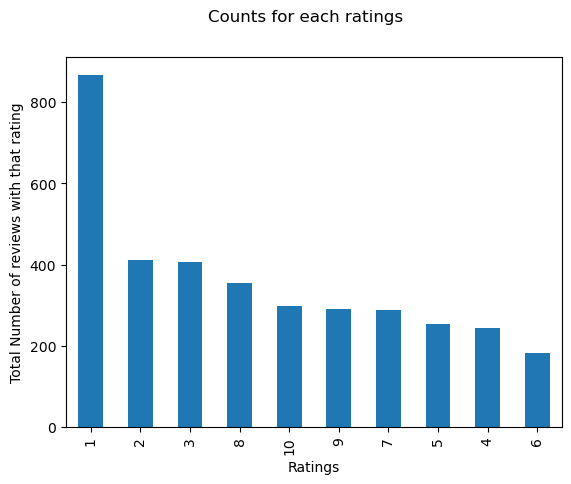

In [8]:
Clean_BA_Data.stars.value_counts().plot(kind = "bar")
plt.xlabel("Ratings")
plt.ylabel("Total Number of reviews with that rating")
plt.suptitle("Counts for each ratings")

In [9]:
df_ratings = pd.DataFrame(Clean_BA_Data.stars.value_counts())
pct_values = (df_ratings.stars.values/ df_ratings.stars.values.sum() *100).tolist()
pct_values = [round(x,2) for x in pct_values]
df_ratings['pct_values'] = pct_values

In [10]:
#resetting index as we do not want to confuse between the index and the rating values
df_ratings = df_ratings.reset_index()

In [11]:
# renaming columns
df_ratings.rename(columns={'index':'Stars', 'stars':'total_counts'}, inplace=True)

In [12]:
df_ratings

,Stars,total_counts,pct_values
0,1,867,24.12
1,2,411,11.44
2,3,407,11.32
3,8,355,9.88
4,10,298,8.29
5,9,291,8.10
6,7,287,7.99
7,5,253,7.04
8,4,243,6.76
9,6,182,5.06


Text(0.5, 1.0, 'Counts for each ratings')

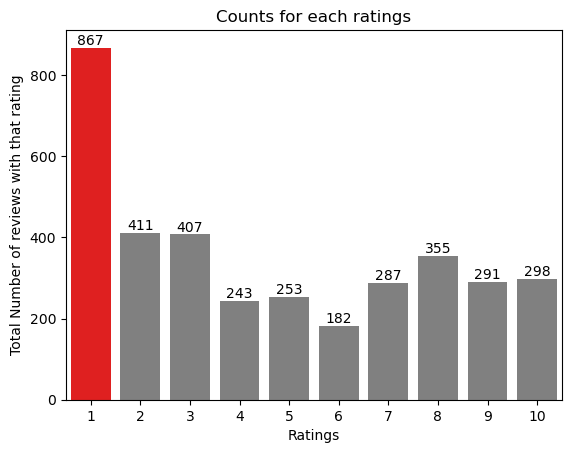

In [13]:
clrs = ['Red' if (x ==  max(df_ratings.total_counts)) else 'grey' for x in df_ratings.total_counts ]
ax = sns.barplot(x=df_ratings.Stars, y=df_ratings.total_counts, data=df_ratings, errwidth=0,
                palette=clrs)


ax.bar_label(ax.containers[0])
    
ax.set_xlabel("Ratings")
ax.set_ylabel("Total Number of reviews with that rating")
ax.set_title("Counts for each ratings")

In [15]:
# Unique countries BA recieved the reviews from

print(f"{len(Clean_BA_Data.country.unique())} unique countries")

70 unique countries


### Countries from which most reviews come from.

In [16]:
df_country_review = pd.DataFrame(Clean_BA_Data.country.value_counts().head()).reset_index()

In [17]:
df_country_review.rename(columns={'index':'country','country':'total_reviews'}, inplace=True)

Text(0.5, 1.0, 'Maximum number of review by country')

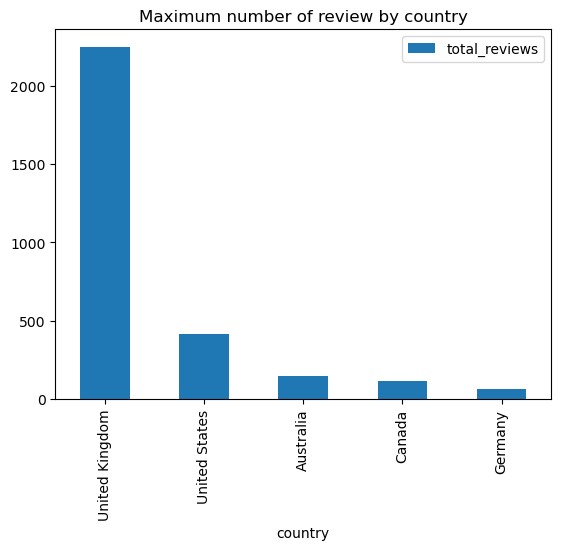

In [18]:
df_country_review.plot(kind="bar", x='country')
plt.title("Maximum number of review by country")

### Countries which gave higher reating to British Airways

In [19]:
df_country_rating = pd.DataFrame(Clean_BA_Data.groupby('country').mean()['stars'].sort_values(ascending = False)).reset_index()

In [20]:
df_country_rating.rename(columns={'stars':'avg_rating'}, inplace=True)

Text(0.5, 1.0, 'Top 10 Countries with avg highest rating provided to British Airways')

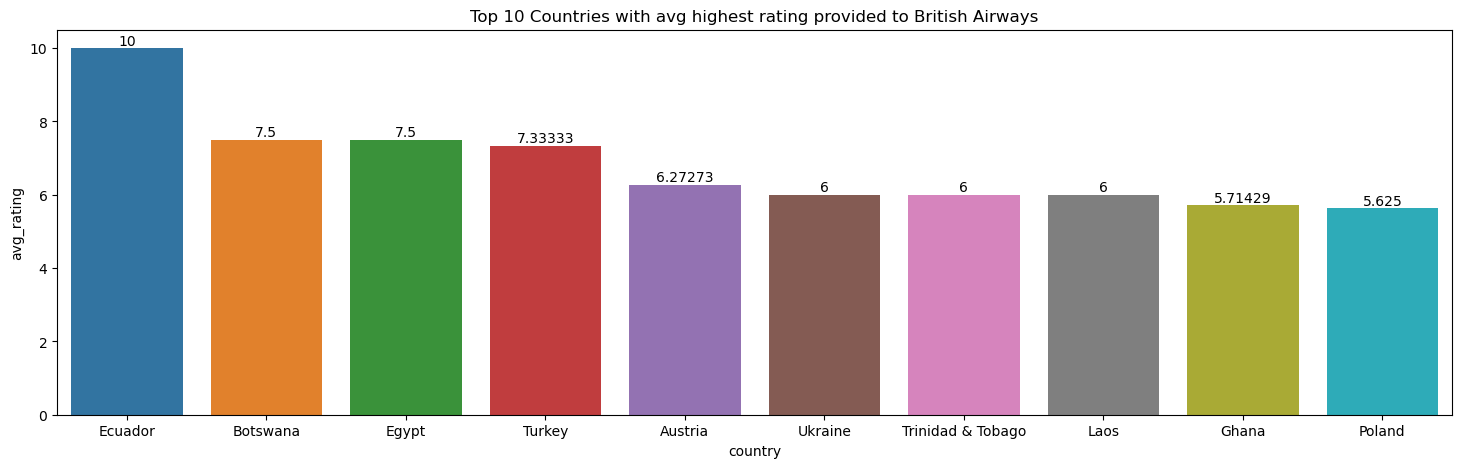

In [22]:
fig, ax = plt.subplots(figsize=(18,5))
ax1 = sns.barplot(x='country', y='avg_rating', data=df_country_rating[:10])
ax.bar_label(ax.containers[0])
ax.set_title("Top 10 Countries with avg highest rating provided to British Airways")

### Time Series Analysis

In [23]:
#convert the date datatype to datetime

Clean_BA_Data.date = pd.to_datetime(Clean_BA_Data.date)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '28-03-2024' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '26-03-2024' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '25-03-2024' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '21-03-2024' in DD/MM/YYYY format. Provide format or specif

In [27]:
# Extract year from the 'date' column
Clean_BA_Data['year'] = Clean_BA_Data['date'].dt.year

In [38]:
# Calculate the percentage of stars for each year
star_percentage_by_year = Clean_BA_Data.groupby(['year', 'stars']).size().groupby(level=0).apply(lambda x: 100 * x / x.sum()).reset_index(name='stars_percentage')

# Create bar plot
fig = px.bar(star_percentage_by_year, x='year', y='stars_percentage', color='stars', text='stars_percentage',
             title='Percentage of Stars by Year')

# Show the plot
fig.show()

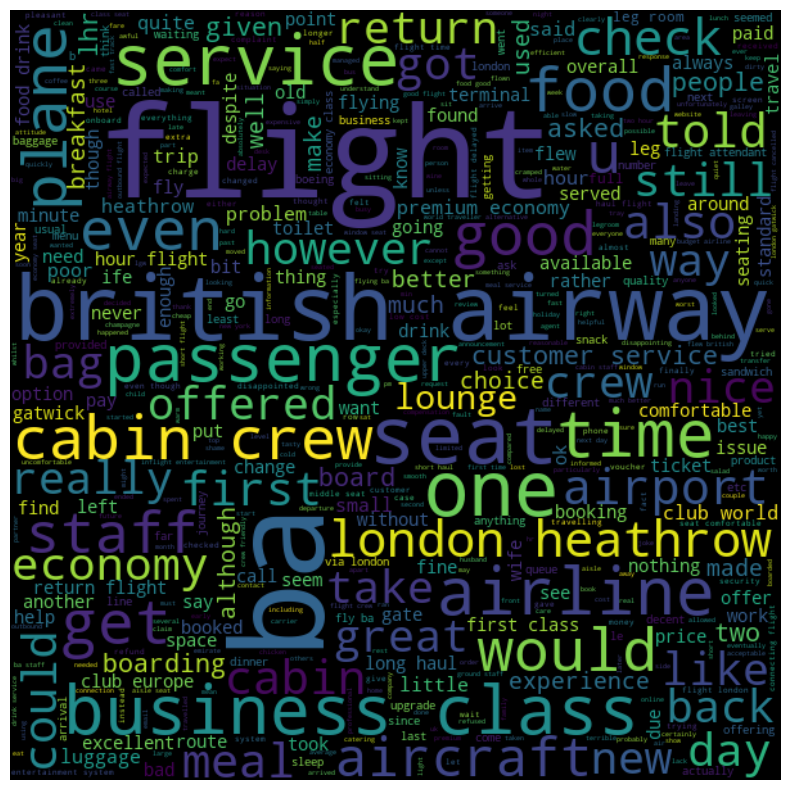

In [39]:
import nltk
from nltk.corpus import stopwords
# Start with one review:
reviews = " ".join(Clean_BA_Data.corpus)
plt.figure(figsize=(20,10))

stopwords = set(stopwords.words('english'))

# Create and generate a word cloud image:
wordcloud = WordCloud(height=600,width=600,max_font_size=100, max_words=500, stopwords=stopwords).generate(reviews)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

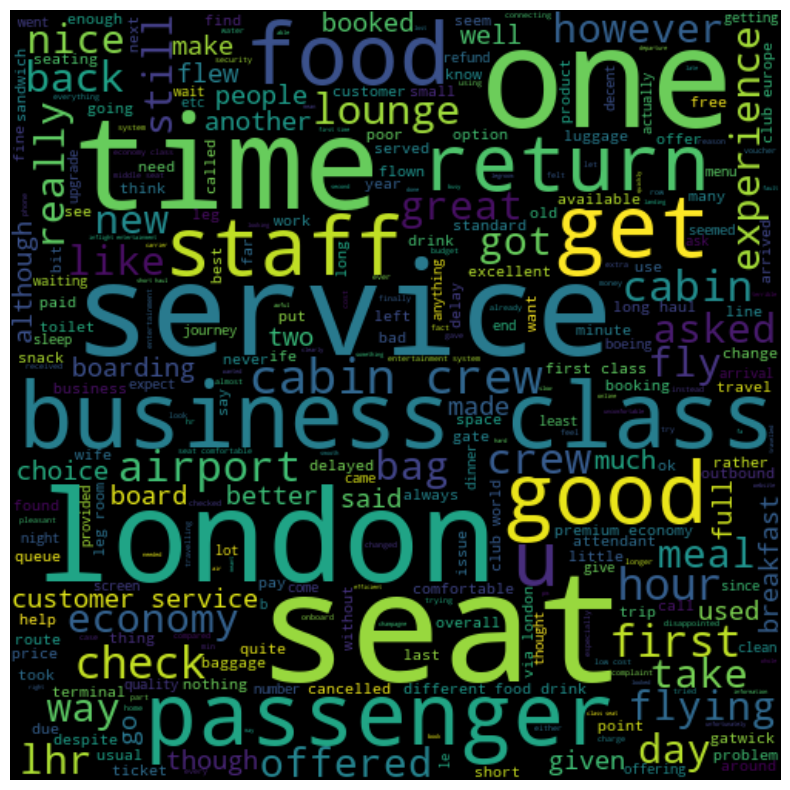

In [40]:
import nltk
from nltk.corpus import stopwords
reviews = " ".join(Clean_BA_Data.corpus)
plt.figure(figsize=(20,10))

stopwords = set(stopwords.words('english'))
stopwords.update(["ba","flight", "british","airway", "airline","plane", "told","also","passenger" \
                 "london", "heathrow", "aircraft", "could","even", "would"])
# Create and generate a word cloud image:
wordcloud = WordCloud(height=500,width=500,max_font_size=100, max_words=300, stopwords=stopwords).generate(reviews)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Word Frequency

In [41]:
from nltk import ngrams
from nltk.probability import FreqDist

from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer

#split the text of all reviews into a list of words
words = reviews.split(" ")

#remove certain words that will not be used to determine the positive or negative sentiment
stopwords = text.ENGLISH_STOP_WORDS.union(['flight', 'ba', "passenger","u", "london","airway","british","airline",\
                                           "heathrow","plane","lhr","review"])


new_words = [word for word in words if word not in stopwords]

nlp_words=FreqDist(new_words).most_common(20)

#create a dataframe of these word and its frequencies
all_fdist = pd.Series(dict(nlp_words))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'seat'),
  Text(1, 0, 'service'),
  Text(2, 0, 'time'),
  Text(3, 0, 'food'),
  Text(4, 0, 'crew'),
  Text(5, 0, 'good'),
  Text(6, 0, 'cabin'),
  Text(7, 0, 'class'),
  Text(8, 0, 'hour'),
  Text(9, 0, 'business'),
  Text(10, 0, 'staff'),
  Text(11, 0, 'economy'),
  Text(12, 0, 'check'),
  Text(13, 0, 'drink'),
  Text(14, 0, 'meal'),
  Text(15, 0, 'return'),
  Text(16, 0, 'lounge'),
  Text(17, 0, 'club'),
  Text(18, 0, 'boarding'),
  Text(19, 0, 'customer')])

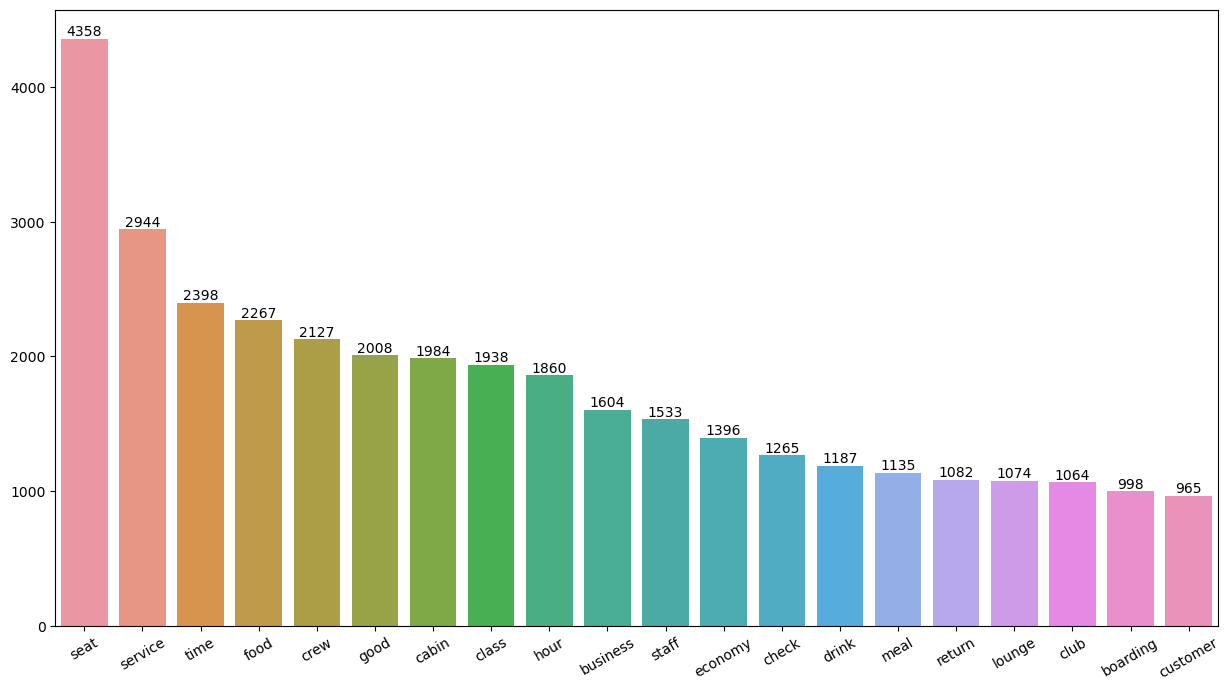

In [42]:
## Setting figure, ax into variables
fig, ax = plt.subplots(figsize=(15,8))

## Seaborn plotting using Pandas attributes + xtick rotation for ease of viewing
all_plot = sns.barplot(x=all_fdist.index, y=all_fdist.values, ax=ax)
all_plot.bar_label(all_plot.containers[0])
plt.xticks(rotation=30)

### Word Frequency with N-gram

<AxesSubplot:>

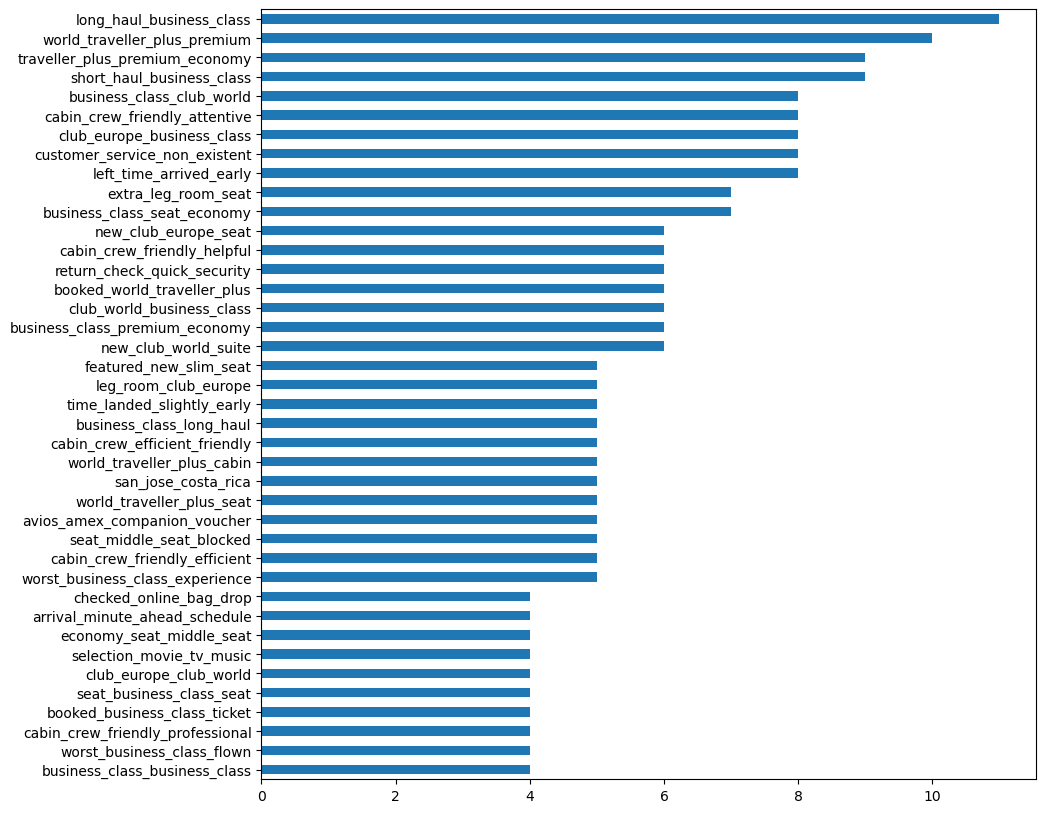

In [44]:
## Imports
import nltk.collocations as collocations
from nltk import FreqDist, bigrams

reviews = " ".join(Clean_BA_Data.corpus)

#split the text of all reviews into a list of words
words = reviews.split(" ")

new_words = [word for word in words if word not in stopwords]

def get_freq_dist(new_words,number_of_ngrams ):
    from nltk import ngrams
    
    ## Generate bigrams
    ngrams = ngrams(new_words, number_of_ngrams)

    ## Creating FreqDist
    ngram_fd = FreqDist(ngrams).most_common(40)

    ## Sort values by highest frequency
    ngram_sorted = {k:v for k,v in sorted(ngram_fd, key=lambda item:item[1])}

    ## Join bigram tokens with '_' + maintain sorting
    ngram_joined = {'_'.join(k):v for k,v in sorted(ngram_fd, key=lambda item:item[1])}

    ## Convert to Pandas series for easy plotting
    ngram_freqdist = pd.Series(ngram_joined)
    plt.figure(figsize=(10,10))
    ax = ngram_freqdist.plot(kind="barh")
    
    return ax


get_freq_dist(new_words,4)

In [46]:
ratings_1_3 = Clean_BA_Data[Clean_BA_Data.stars.isin([1,2,3])]
ratings_4_6 = Clean_BA_Data[Clean_BA_Data.stars.isin([4,5,6])]
ratings_7_10 = Clean_BA_Data[Clean_BA_Data.stars.isin([7,8,9,10])]

<AxesSubplot:>

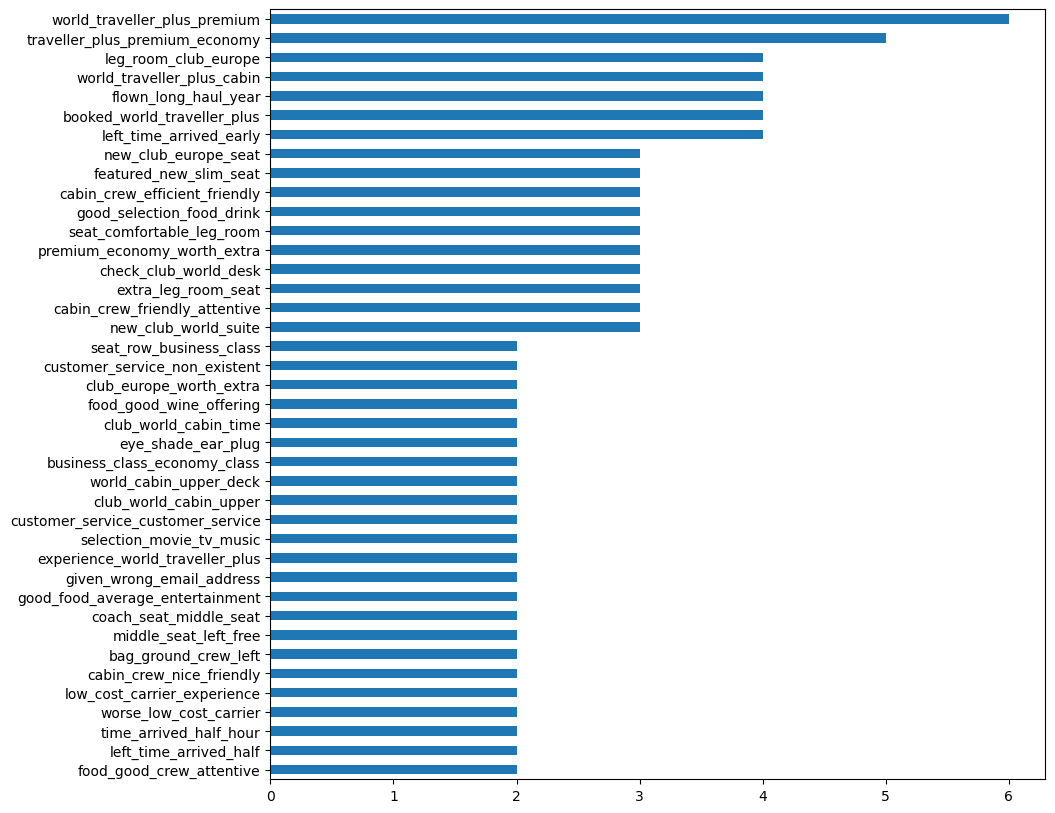

In [47]:
reviews_1_3 = " ".join(ratings_1_3.corpus)
reviews_4_6 = " ".join(ratings_4_6.corpus)
reviews_7_10 = " ".join(ratings_7_10.corpus)

#split the text of all reviews into a list of words
words_1_3 = reviews_1_3.split(" ")
words_4_6 = reviews_4_6.split(" ")
words_7_10 = reviews_7_10.split(" ")


new_words_7_10 = [word for word in words_7_10 if word not in stopwords]

get_freq_dist(new_words_7_10,4)

<AxesSubplot:>

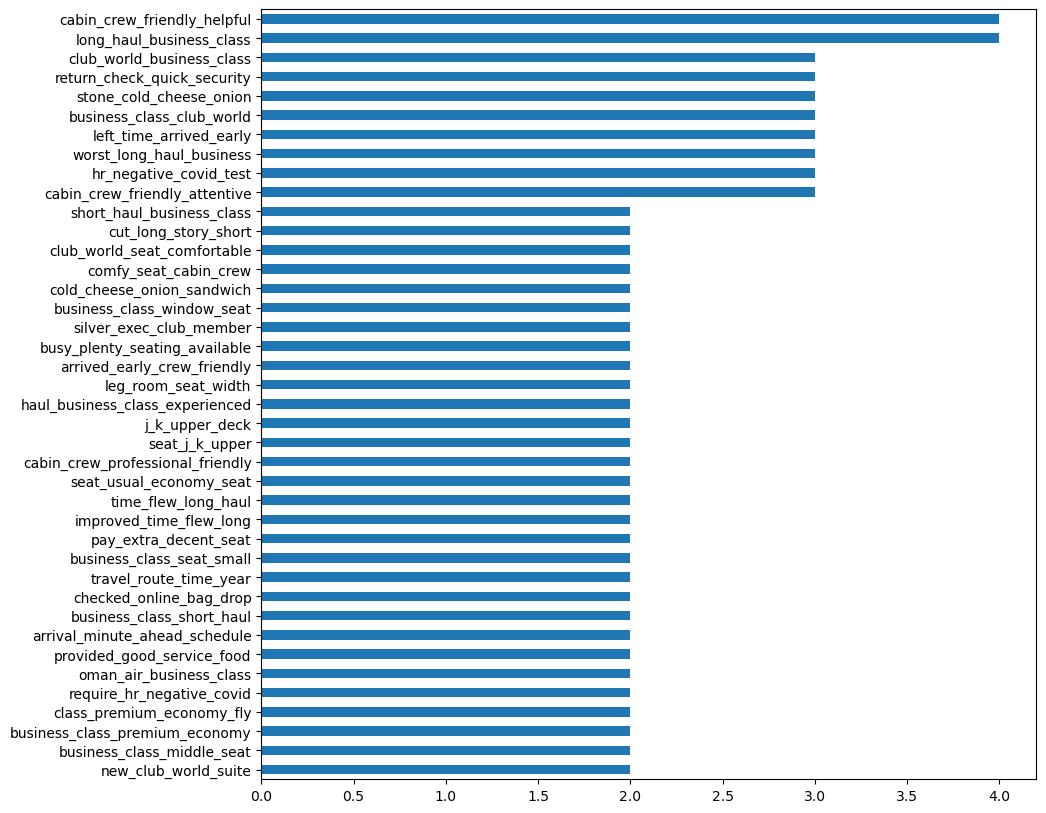

In [48]:
new_words = [word for word in words_4_6 if word not in stopwords]

get_freq_dist(new_words,4)

<AxesSubplot:>

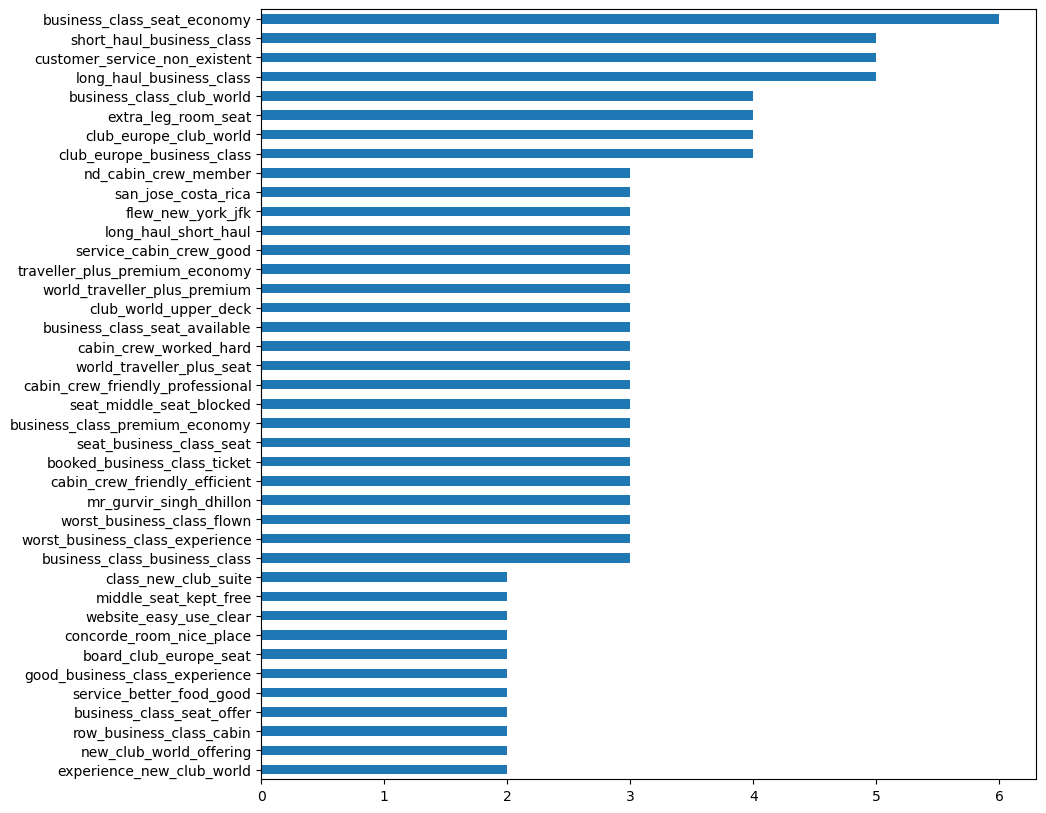

In [49]:
new_words = [word for word in words_1_3 if word not in stopwords]

get_freq_dist(new_words,4)

In [52]:
pip install textblob


Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 626.3/626.3 kB 2.3 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 4.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [53]:
%%capture
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer

#set a column Polarity with all 0 values initially
Clean_BA_Data['polarity'] = 0

for i in range(len(Clean_BA_Data.corpus)):
    sent= TextBlob(Clean_BA_Data.corpus[i])
    polarity  = sent.sentiment.polarity
    subjectivity  = sent.sentiment.subjectivity
    Clean_BA_Data['polarity'][i] = polarity

In [55]:
print(f"{Clean_BA_Data[(Clean_BA_Data['polarity'] >-0.2) & (Clean_BA_Data['polarity'] <0.2)].shape[0]} number of reviews between -0.2 and 0.2 polarity score")

print(f"{Clean_BA_Data[(Clean_BA_Data['polarity'] >-0.1) & (Clean_BA_Data['polarity'] <0.1)].shape[0]} number of reviews between -0.1 and 0.1 polarity score")

2443 number of reviews between -0.2 and 0.2 polarity score
1418 number of reviews between -0.1 and 0.1 polarity score


In [57]:
import nltk
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\vatsa\AppData\Roaming\nltk_data...


True

In [58]:
%%capture
import nltk

from nltk.sentiment.vader import SentimentIntensityAnalyzer 
vds = SentimentIntensityAnalyzer()
# text = 'This is an extremely entertaining movie'

#set a column Polarity with all 0 values initially
Clean_BA_Data['label'] = 0
    
for i in range(len(Clean_BA_Data.corpus)):
    
    score = vds.polarity_scores(Clean_BA_Data.corpus[i])['compound']
    #print(score)
    if score > 0.2:
        Clean_BA_Data['label'][i] = 1
        #print("1st")
    elif score < 0:
        Clean_BA_Data['label'][i] = -1
        #print("2nd")
    else:
        Clean_BA_Data['label'][i] = 0

In [60]:
Clean_BA_Data.label.value_counts()

 1    2275
-1    1198
 0     121
Name: label, dtype: int64